# Features in credit_card_balance

In [343]:
### set up system path to access helpers functions

import sys
import os

# Get the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the 'src' folder to sys.path
if src_path not in sys.path:
  sys.path.append(src_path)

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import *

In [345]:
# import data from credit_card_balance

df = pd.read_csv('../data/credit_card_balance.csv')

df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [346]:
# get the info

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MIN_REGULARITY     3535076 non-null  float64
 10  AMT_PAYMENT_CURRENT         3072324 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   3840312 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    3840312 non-null  float64
 1

Features to engineer:

1. average credit usage ratio = average (balance / limit)
2. average cash withdrawal ratio = average (ATM / balance)
3. average number of ATM drawings = average (count drawings ATM current)
4. contract status count

# Start a dataframe to collect engineered columns

- include SK_ID_PREV and SK_ID_CURR

In [347]:
engineered_cc = df[['SK_ID_CURR', 'SK_ID_PREV']].copy()
engineered_cc

,SK_ID_CURR,SK_ID_PREV
0,378907,2562384
1,363914,2582071
2,371185,1740877
3,337855,1389973
4,126868,1891521
...,...,...
3840307,328243,1036507
3840308,347207,1714892
3840309,215757,1302323
3840310,430337,1624872


### New feature: 1. prev_cc_avg_credit_usage_ratio

In [348]:
# calculate the ratio for each row

df['credit_usage_ratio'] = df['AMT_BALANCE'] / (df['AMT_CREDIT_LIMIT_ACTUAL'])
df['credit_usage_ratio'] = df['credit_usage_ratio'].replace([np.inf, -np.inf], 0)
df['credit_usage_ratio'] = df['credit_usage_ratio'].fillna(0)
df['credit_usage_ratio'].describe()

count    3.840312e+06
mean     3.011228e-01
std      4.138260e-01
min     -1.800000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.466048e-01
max      1.177751e+01
Name: credit_usage_ratio, dtype: float64

<Axes: >

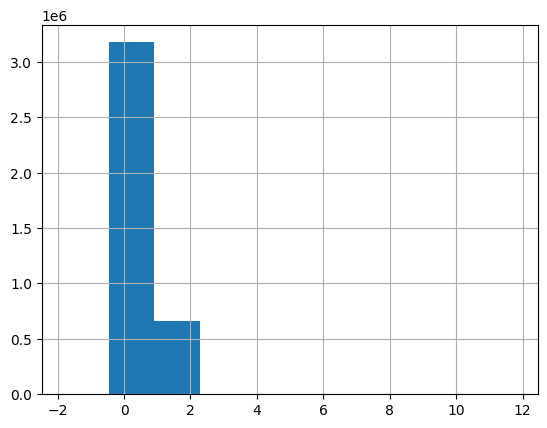

In [349]:
# check the distribution

df['credit_usage_ratio'].hist()

In [350]:
# calculate the average ratio by loan using groupby

avg_usage_ratio_per_loan = pd.DataFrame(df.groupby('SK_ID_PREV')['credit_usage_ratio'].mean()).reset_index()
avg_usage_ratio_per_loan.columns = ['SK_ID_PREV','cc_avg_credit_usage_ratio']
avg_usage_ratio_per_loan

,SK_ID_PREV,cc_avg_credit_usage_ratio
0,1000018,0.923080
1,1000030,0.630494
2,1000031,0.327366
3,1000035,0.000000
4,1000077,0.000000
...,...,...
104302,2843476,0.210766
104303,2843477,0.024638
104304,2843478,0.056793
104305,2843493,0.376981


In [351]:
# merge into the engineered_cc dataframe on SK_ID_PREV

engineered_cc = pd.merge(engineered_cc, avg_usage_ratio_per_loan, on="SK_ID_PREV", how="outer")

# check for nulls
engineered_cc.isna().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
cc_avg_credit_usage_ratio    0
dtype: int64

### New feature: 2. average cash withdrawal ratio = average (ATM / balance)

In [352]:
# calculate the average cash withdrawal ratio

df['cash_withdrawal_ratio'] = df['AMT_DRAWINGS_ATM_CURRENT'] / df['AMT_BALANCE']
df['cash_withdrawal_ratio'] = df['cash_withdrawal_ratio'].fillna(0)
df['cash_withdrawal_ratio']

0          0.000000
1          0.035170
2          0.000000
3          0.009511
4          0.000000
             ...   
3840307    0.000000
3840308    0.000000
3840309    0.979024
3840310    0.000000
3840311    0.000000
Name: cash_withdrawal_ratio, Length: 3840312, dtype: float64

In [353]:
# groupby SK_ID_PREV and aggregate with the average

cash_withdrawal_ratio_per_loan = pd.DataFrame(df.groupby('SK_ID_PREV')['cash_withdrawal_ratio'].mean()).reset_index()
cash_withdrawal_ratio_per_loan.columns = ['SK_ID_PREV','avg_cc_ATM_ratio']
cash_withdrawal_ratio_per_loan['avg_cc_ATM_ratio'] = cash_withdrawal_ratio_per_loan['avg_cc_ATM_ratio'].replace([np.inf, -np.inf],0)
cash_withdrawal_ratio_per_loan['avg_cc_ATM_ratio']

0         0.093159
1         0.036096
2         0.123707
3         0.000000
4         0.000000
            ...   
104302    0.005462
104303    0.010779
104304    0.014031
104305    0.000000
104306    0.108030
Name: avg_cc_ATM_ratio, Length: 104307, dtype: float64

In [354]:
# merge into the engineered features dataframe

engineered_cc = pd.merge(engineered_cc, cash_withdrawal_ratio_per_loan, on='SK_ID_PREV', how='outer')
engineered_cc

,SK_ID_CURR,SK_ID_PREV,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio
0,394447,1000018,0.923080,0.093159
1,394447,1000018,0.923080,0.093159
2,394447,1000018,0.923080,0.093159
3,394447,1000018,0.923080,0.093159
4,394447,1000018,0.923080,0.093159
...,...,...,...,...
3840307,425374,2843496,0.070434,0.108030
3840308,425374,2843496,0.070434,0.108030
3840309,425374,2843496,0.070434,0.108030
3840310,425374,2843496,0.070434,0.108030


### New feature 3. average number of ATM drawings = average (count drawings ATM current)

In [355]:
# use groupby to get on average how many ATM drawings there are per month per loan

avg_ATM_drawings_per_loan = pd.DataFrame(df.groupby('SK_ID_PREV')['CNT_DRAWINGS_ATM_CURRENT'].mean()).reset_index()
avg_ATM_drawings_per_loan.columns = ['SK_ID_PREV', 'avg_cc_cnt_ATM_drawings']
avg_ATM_drawings_per_loan = avg_ATM_drawings_per_loan.fillna(0)
avg_ATM_drawings_per_loan

,SK_ID_PREV,avg_cc_cnt_ATM_drawings
0,1000018,1.200000
1,1000030,0.142857
2,1000031,0.307692
3,1000035,0.000000
4,1000077,0.000000
...,...,...
104302,2843476,0.021053
104303,2843477,0.070588
104304,2843478,0.044444
104305,2843493,0.000000


In [356]:
# merge into the engineered features dataframe

engineered_cc = pd.merge(engineered_cc, avg_ATM_drawings_per_loan, on='SK_ID_PREV', how='outer')
engineered_cc

,SK_ID_CURR,SK_ID_PREV,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings
0,394447,1000018,0.923080,0.093159,1.2
1,394447,1000018,0.923080,0.093159,1.2
2,394447,1000018,0.923080,0.093159,1.2
3,394447,1000018,0.923080,0.093159,1.2
4,394447,1000018,0.923080,0.093159,1.2
...,...,...,...,...,...
3840307,425374,2843496,0.070434,0.108030,0.2
3840308,425374,2843496,0.070434,0.108030,0.2
3840309,425374,2843496,0.070434,0.108030,0.2
3840310,425374,2843496,0.070434,0.108030,0.2


### NAME_CONTRACT_STATUS

In [357]:
# check the value counts

df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64

In [358]:
# Group into: Active(Active, Signed, Sent proposal, Approved), Completed, Negative(Demand, Refused)

df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].replace({'Signed':'Active', 'Sent proposal':'Active', 'Approved':'Active', 'Demand':'Negative', 'Refused':'Negative'})
df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active       3710012
Completed     128918
Negative        1382
Name: count, dtype: int64

In [359]:
# Change the NAME_CONTRACT_STATUS into 3 separate binary features for each of the status types

df['cc_status_active'] = (df['NAME_CONTRACT_STATUS'] == 'Active').astype(int)
df['cc_status_completed'] = (df['NAME_CONTRACT_STATUS'] == 'Completed').astype(int)
df['cc_status_negative'] = (df['NAME_CONTRACT_STATUS'] == 'Negative').astype(int)

In [360]:
# use groupby to total the number of active status types per loan

df_cc_status = pd.DataFrame(df.groupby('SK_ID_PREV')['cc_status_active'].sum()).reset_index()
df_cc_status.columns = ['SK_ID_PREV', 'cc_status_active_ttl']
df_cc_status

,SK_ID_PREV,cc_status_active_ttl
0,1000018,5
1,1000030,8
2,1000031,16
3,1000035,5
4,1000077,11
...,...,...
104302,2843476,95
104303,2843477,85
104304,2843478,90
104305,2843493,15


In [361]:
# use groupby to total the number of completed status types per loan

df_cc_status_completed = pd.DataFrame(df.groupby('SK_ID_PREV')['cc_status_completed'].sum()).reset_index()
df_cc_status_completed.columns = ['SK_ID_PREV', 'cc_status_completed_ttl']
df_cc_status_completed

,SK_ID_PREV,cc_status_completed_ttl
0,1000018,0
1,1000030,0
2,1000031,0
3,1000035,0
4,1000077,0
...,...,...
104302,2843476,0
104303,2843477,0
104304,2843478,0
104305,2843493,0


In [362]:
# merge into df_bb_status dataframe

df_cc_status = pd.merge(df_cc_status, df_cc_status_completed, on='SK_ID_PREV', how='outer')
df_cc_status

,SK_ID_PREV,cc_status_active_ttl,cc_status_completed_ttl
0,1000018,5,0
1,1000030,8,0
2,1000031,16,0
3,1000035,5,0
4,1000077,11,0
...,...,...,...
104302,2843476,95,0
104303,2843477,85,0
104304,2843478,90,0
104305,2843493,15,0


In [363]:
# use groupby to total the number of negative status types per loan

df_cc_status_negative = pd.DataFrame(df.groupby('SK_ID_PREV')['cc_status_negative'].sum()).reset_index()
df_cc_status_negative.columns = ['SK_ID_PREV', 'cc_status_negative_ttl']
df_cc_status_negative

,SK_ID_PREV,cc_status_negative_ttl
0,1000018,0
1,1000030,0
2,1000031,0
3,1000035,0
4,1000077,0
...,...,...
104302,2843476,0
104303,2843477,0
104304,2843478,0
104305,2843493,0


### New features 4. status count

In [364]:
# merge into df_bb_status dataframe

df_cc_status = pd.merge(df_cc_status, df_cc_status_negative, on='SK_ID_PREV', how='outer')
df_cc_status

,SK_ID_PREV,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl
0,1000018,5,0,0
1,1000030,8,0,0
2,1000031,16,0,0
3,1000035,5,0,0
4,1000077,11,0,0
...,...,...,...,...
104302,2843476,95,0,0
104303,2843477,85,0,0
104304,2843478,90,0,0
104305,2843493,15,0,0


In [365]:
# merge into engineered_cc dataframe on SK_ID_PREV

engineered_cc = pd.merge(engineered_cc, df_cc_status, on="SK_ID_PREV", how="outer")

# check for nulls
engineered_cc.isna().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
cc_avg_credit_usage_ratio    0
avg_cc_ATM_ratio             0
avg_cc_cnt_ATM_drawings      0
cc_status_active_ttl         0
cc_status_completed_ttl      0
cc_status_negative_ttl       0
dtype: int64

### SK_DPD

DPD (Days past due) during the month on the previous credit

In [366]:
# get the average per loan

df_DPD_average = pd.DataFrame(df.groupby('SK_ID_PREV')['SK_DPD'].mean()).reset_index()
df_DPD_average.columns = ['SK_ID_PREV', 'avg_cc_DPD']
df_DPD_average

,SK_ID_PREV,avg_cc_DPD
0,1000018,0.000000
1,1000030,0.000000
2,1000031,0.000000
3,1000035,0.000000
4,1000077,0.000000
...,...,...
104302,2843476,15.031579
104303,2843477,0.000000
104304,2843478,0.000000
104305,2843493,0.000000


In [367]:
# merge into engineered_cc dataframe on SK_ID_PREV

engineered_cc = pd.merge(engineered_cc, df_DPD_average, on="SK_ID_PREV", how="outer")

# check for nulls
engineered_cc.isna().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
cc_avg_credit_usage_ratio    0
avg_cc_ATM_ratio             0
avg_cc_cnt_ATM_drawings      0
cc_status_active_ttl         0
cc_status_completed_ttl      0
cc_status_negative_ttl       0
avg_cc_DPD                   0
dtype: int64

### SK_DPD_DEF

DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

In [368]:
# get the average per loan

df_DPD_DEF_average = pd.DataFrame(df.groupby('SK_ID_PREV')['SK_DPD_DEF'].mean()).reset_index()
df_DPD_DEF_average.columns = ['SK_ID_PREV', 'avg_cc_DPD_DEF']
df_DPD_DEF_average

,SK_ID_PREV,avg_cc_DPD_DEF
0,1000018,0.000000
1,1000030,0.000000
2,1000031,0.000000
3,1000035,0.000000
4,1000077,0.000000
...,...,...
104302,2843476,3.473684
104303,2843477,0.000000
104304,2843478,0.000000
104305,2843493,0.000000


In [369]:
# merge into engineered_cc dataframe on SK_ID_PREV

engineered_cc = pd.merge(engineered_cc, df_DPD_DEF_average, on="SK_ID_PREV", how="outer")

# check for nulls
engineered_cc.isna().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
cc_avg_credit_usage_ratio    0
avg_cc_ATM_ratio             0
avg_cc_cnt_ATM_drawings      0
cc_status_active_ttl         0
cc_status_completed_ttl      0
cc_status_negative_ttl       0
avg_cc_DPD                   0
avg_cc_DPD_DEF               0
dtype: int64

In [370]:
# check the dataframe

engineered_cc

,SK_ID_CURR,SK_ID_PREV,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF
0,394447,1000018,0.923080,0.093159,1.2,5,0,0,0.0,0.0
1,394447,1000018,0.923080,0.093159,1.2,5,0,0,0.0,0.0
2,394447,1000018,0.923080,0.093159,1.2,5,0,0,0.0,0.0
3,394447,1000018,0.923080,0.093159,1.2,5,0,0,0.0,0.0
4,394447,1000018,0.923080,0.093159,1.2,5,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3840307,425374,2843496,0.070434,0.108030,0.2,15,0,0,0.0,0.0
3840308,425374,2843496,0.070434,0.108030,0.2,15,0,0,0.0,0.0
3840309,425374,2843496,0.070434,0.108030,0.2,15,0,0,0.0,0.0
3840310,425374,2843496,0.070434,0.108030,0.2,15,0,0,0.0,0.0


# groupby SK_ID_CURR

In [371]:
# groupby SK_ID_CURR

engineered_cc = engineered_cc.groupby('SK_ID_CURR').mean()
engineered_cc

,SK_ID_PREV,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF
SK_ID_CURR,,,,,,,,,
100006,1489396.0,0.000000,0.000000,0.000000,6.0,0.0,0.0,0.000000,0.000000
100011,1843384.0,0.302678,0.012870,0.054054,74.0,0.0,0.0,0.000000,0.000000
100013,2038692.0,0.115301,0.041377,0.255556,96.0,0.0,0.0,0.010417,0.010417
100021,2594025.0,0.000000,0.000000,0.000000,7.0,10.0,0.0,0.000000,0.000000
100023,1499902.0,0.000000,0.000000,0.000000,8.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
456244,2181926.0,0.292966,0.000000,1.048780,36.0,5.0,0.0,0.000000,0.000000
456246,1079732.0,0.097309,0.000000,0.000000,8.0,0.0,0.0,0.000000,0.000000
456247,1595171.0,0.128980,0.037150,0.115789,95.0,0.0,0.0,0.031579,0.021053


In [372]:
#check for nulls

engineered_cc.isna().sum()

SK_ID_PREV                   0
cc_avg_credit_usage_ratio    0
avg_cc_ATM_ratio             0
avg_cc_cnt_ATM_drawings      0
cc_status_active_ttl         0
cc_status_completed_ttl      0
cc_status_negative_ttl       0
avg_cc_DPD                   0
avg_cc_DPD_DEF               0
dtype: int64

In [373]:
# check for inf

engineered_cc[(engineered_cc == np.inf) | (engineered_cc == -np.inf)].sum()

SK_ID_PREV                   0.0
cc_avg_credit_usage_ratio    0.0
avg_cc_ATM_ratio             0.0
avg_cc_cnt_ATM_drawings      0.0
cc_status_active_ttl         0.0
cc_status_completed_ttl      0.0
cc_status_negative_ttl       0.0
avg_cc_DPD                   0.0
avg_cc_DPD_DEF               0.0
dtype: float64

In [374]:
# reset index

engineered_cc = engineered_cc.reset_index()
engineered_cc.drop(columns='SK_ID_PREV', inplace=True)
engineered_cc

,SK_ID_CURR,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF
0,100006,0.000000,0.000000,0.000000,6.0,0.0,0.0,0.000000,0.000000
1,100011,0.302678,0.012870,0.054054,74.0,0.0,0.0,0.000000,0.000000
2,100013,0.115301,0.041377,0.255556,96.0,0.0,0.0,0.010417,0.010417
3,100021,0.000000,0.000000,0.000000,7.0,10.0,0.0,0.000000,0.000000
4,100023,0.000000,0.000000,0.000000,8.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
103553,456244,0.292966,0.000000,1.048780,36.0,5.0,0.0,0.000000,0.000000
103554,456246,0.097309,0.000000,0.000000,8.0,0.0,0.0,0.000000,0.000000
103555,456247,0.128980,0.037150,0.115789,95.0,0.0,0.0,0.031579,0.021053
103556,456248,0.000000,0.000000,0.000000,23.0,0.0,0.0,0.000000,0.000000


In [375]:
# export to csv

# engineered_cc.to_csv('../data/engineered_cc.csv', index=False)